In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
os.chdir("P:\\Courses\\MMA 865 - Big Data Analytics\\Kaggle-Spam")

In [4]:
train = pd.read_csv("spamraw_train.csv")
test=pd.read_csv("spamraw_test.csv")

In [5]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5000 non-null   int64 
 1   sms_text  5000 non-null   object
 2   spam      5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


,id,sms_text,spam
0,1,Hope you are having a good week. Just checking in,0
1,2,K..give back my thanks.,0
2,3,Am also doing in cbe only. But have to pay.,0
3,4,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",1
4,5,okmail: Dear Dave this is your final notice to...,1


In [6]:
train.groupby('spam').describe()

id                                                               
       count         mean          std  min     25%     50%     75%     max
spam                                                                       
0     4327.0  2497.964178  1443.798687  1.0  1247.5  2494.0  3735.5  5000.0
1      673.0  2516.803863  1442.693061  4.0  1267.0  2534.0  3803.0  4997.0

In [7]:
train['length'] = train['sms_text'].apply(len)
train.head()

,id,sms_text,spam,length
0,1,Hope you are having a good week. Just checking in,0,49
1,2,K..give back my thanks.,0,23
2,3,Am also doing in cbe only. But have to pay.,0,43
3,4,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",1,149
4,5,okmail: Dear Dave this is your final notice to...,1,161


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

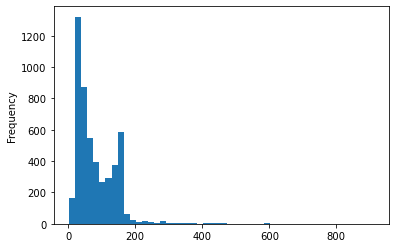

In [9]:
train['length'].plot(bins=50, kind='hist') 

In [10]:
train.length.describe()

count    5000.000000
mean       79.965600
std        59.054747
min         2.000000
25%        35.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

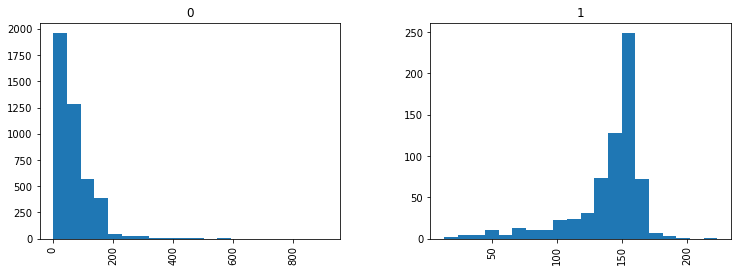

In [11]:
train.hist(column='length', by='spam', bins=20,figsize=(12,4))

In [12]:
from nltk.corpus import stopwords
import string
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    lemma = nlp.WordNetLemmatizer()
    nopunc = [ lemma.lemmatize(word) for word in nopunc]

In [14]:
train['sms_text'].head(5).apply(text_process)

0                         [Hope, good, week, checking]
1                                [Kgive, back, thanks]
2                                     [also, cbe, pay]
3    [complimentary, 4, STAR, Ibiza, Holiday, £1000...
4    [okmail, Dear, Dave, final, notice, collect, 4...
Name: sms_text, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(train['sms_text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

10671


In [17]:
messages_bow = bow_transformer.transform(train['sms_text'])

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5000, 10671)


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(train.spam)

In [21]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(train['sms_text'], y, test_size=0.2, random_state = 42)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4000 1000 5000


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Naive Bayes 


In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, train['spam'])

In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(train['spam'], all_predictions))

In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
pipeline.fit(msg_train,label_train)

In [ ]:
#predictions = pipeline.predict(msg_test)
predictionss = pipeline.predict(msg_test)

In [ ]:
print(classification_report(predictions,label_test))

In [ ]:
print(classification_report(predictionss,label_test))

In [ ]:
predictions1 = pipeline.predict(test['sms_text']) #FINAL PREDICTION OF NB MODEL on KAggle Test Data

In [ ]:
# Output the predictions to a file to upload to Kaggle.
my_submission1n = pd.DataFrame({'id': test.id, 'predicted': predictions1})
my_submission1n.head()
my_submission1n.to_csv('my_submission1n.csv', index=False)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=0)
classifier.fit(messages_tfidf, train['spam'])

In [ ]:
predictions2 = classifier.predict(messages_bow)
print(predictions2)

In [ ]:
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [ ]:
pipeline_rf.fit(msg_train,label_train)

In [ ]:
#predictions3 = pipeline_rf.predict(msg_test)

In [ ]:
predictions3n = pipeline_rf.predict(msg_test)

In [ ]:
print(classification_report(predictions3,label_test))

In [ ]:
print(classification_report(predictions3,label_test))

In [ ]:
predictions4n = pipeline_rf.predict(test['sms_text'])

In [ ]:
my_submission2n = pd.DataFrame({'id': test.id, 'predicted': predictions4n})
my_submission2n.head()
my_submission2n.to_csv('my_submission2n.csv', index=False)

# Basic Logistic Model

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(messages_tfidf, train['spam'])

LogisticRegression()

In [ ]:
pipeline_lr = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ SVM
])

In [ ]:
pipeline_lr.fit(msg_train,label_train)

In [ ]:
predictions5 = pipeline_lr.predict(msg_test)

In [ ]:
print(classification_report(predictions5,label_test))

In [ ]:
predictions6 = pipeline_lr.predict(test['sms_text'])

In [ ]:
my_submission3 = pd.DataFrame({'id': test.id, 'predicted': predictions6})
my_submission3.head()
my_submission3.to_csv('my_submission3.csv', index=False)

# LASSO

In [23]:
l2=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
l2.fit(messages_tfidf, train['spam'])

LogisticRegression(C=1, max_iter=500, random_state=42)

In [24]:
pipeline_l2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(penalty='l2',max_iter=500,C=1)),  # train on TF-IDF vectors w/ SVM
])

In [26]:
pipeline_l2.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001F248E5E798>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(C=1, max_iter=500))])

In [27]:
predictions_l2 = pipeline_l2.predict(msg_test)

In [28]:
print(classification_report(predictions_l2,label_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       915
           1       0.65      1.00      0.79        85

    accuracy                           0.95      1000
   macro avg       0.83      0.98      0.88      1000
weighted avg       0.97      0.95      0.96      1000



In [29]:
predictionsl2 = pipeline_l2.predict(test['sms_text'])

In [31]:
my_submission7 = pd.DataFrame({'id': test.id, 'predicted': predictionsl2})
my_submission7.head()
my_submission7.to_csv('my_submission7.csv', index=False)

,id,predicted
0,12000,0
1,12001,0
2,12002,0
3,12003,0
4,12004,0


# NN

In [20]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(random_state=1)

In [23]:
pipeline_nn = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [24]:
pipeline_nn.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D78D2CA168>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MLPClassifier())])

In [25]:
predictions_nn = pipeline_nn.predict(msg_test)

In [26]:
print(classification_report(predictions_nn,label_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       878
           1       0.91      0.97      0.94       122

    accuracy                           0.98      1000
   macro avg       0.95      0.98      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [27]:
predictionsnn = pipeline_nn.predict(test['sms_text'])

In [39]:
my_submission8 = pd.DataFrame({'id': test.id, 'predicted': predictionsnn})
my_submission8.head()
my_submission8.to_csv('my_submission8.csv', index=False)

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


# Re-tuning NN model

In [28]:
nn2=MLPClassifier(random_state=1,hidden_layer_sizes=150,activation='logistic', solver='lbfgs',alpha=0.2, learning_rate='adaptive',)

In [29]:
pipeline_nn2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', nn2),  # train on TF-IDF vectors w/ SVM
])

In [30]:
pipeline_nn2.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D78D2CA168>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(activation='logistic', alpha=0.2,
                               hidden_layer_sizes=150, learning_rate='adaptive',
                               random_state=1, solver='lbfgs'))])

In [31]:
predictions_nn2 = pipeline_nn2.predict(msg_test)

In [32]:
print(classification_report(predictions_nn2,label_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       878
           1       0.92      0.98      0.94       122

    accuracy                           0.99      1000
   macro avg       0.96      0.98      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [52]:
predictionsnn2 = pipeline_nn2.predict(test['sms_text'])

In [53]:
my_submission9 = pd.DataFrame({'id': test.id, 'predicted': predictionsnn2})
my_submission9.head()
my_submission9.to_csv('my_submission9f.csv', index=False)

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0


# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)

In [ ]:
pipeline_dt = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [ ]:
pipeline_dt.fit(msg_train,label_train)

In [ ]:
predictions_dt = pipeline_dt.predict(msg_test)

In [ ]:
print(classification_report(predictions_dt,label_test))

In [ ]:
predictions7 = pipeline_dt.predict(test['sms_text'])

In [ ]:
my_submission5 = pd.DataFrame({'id': test.id, 'predicted': predictions7})
my_submission5.head()
my_submission5.to_csv('my_submission5.csv', index=False)

# GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.3,max_depth=4,n_estimators=100 ,random_state=0)

In [ ]:
pipeline_gbm = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', GradientBoostingClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [ ]:
gbm

In [ ]:
pipeline_gbm.fit(msg_train,label_train)

In [ ]:
predictions_gbm = pipeline_gbm.predict(msg_test)

In [ ]:
print(classification_report(predictions_gbm,label_test))

In [ ]:
predictions8 = pipeline_gbm.predict(test['sms_text'])

In [ ]:
my_submission6 = pd.DataFrame({'id': test.id, 'predicted': predictions8})
my_submission6.head()
my_submission6.to_csv('my_submission6.csv', index=False)

# Voting Classifier 

In [33]:
from sklearn.ensemble import VotingClassifier

In [44]:
pred_final = VotingClassifier(estimators=[('Neural Networks 1 ', nn), ('Neural Networks 2', nn2)], voting='soft')

In [45]:
pipeline_vc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', pred_final),  # train on TF-IDF vectors w/ SVM
])

In [46]:
pipeline_vc.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001D78D2CA168>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 VotingClassifier(estimators=[('Neural Networks 1 ',
                                               MLPClassifier(random_state=1)),
                                              ('Neural Networks 2',
                                               MLPClassifier(activation='logistic',
                                                             alpha=0.2,
                                                             hidden_layer_sizes=150,
                                                             learning_rate='adaptive',
                                                             random_state=1,
                                                             solver='lbfgs'))],
                                  voting='soft'))])

In [47]:
predictions_vc = pipeline_vc.predict(msg_test)

In [48]:
print(classification_report(predictions_vc,label_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       879
           1       0.91      0.98      0.94       121

    accuracy                           0.98      1000
   macro avg       0.95      0.98      0.97      1000
weighted avg       0.99      0.98      0.99      1000



In [49]:
predictionsVC = pipeline_vc.predict(test['sms_text'])

In [50]:
my_submission10 = pd.DataFrame({'id': test.id, 'predicted': predictionsVC})
my_submission10.head()
my_submission10.to_csv('my_submission10f.csv', index=False)

,id,predicted
0,12000,1
1,12001,0
2,12002,0
3,12003,0
4,12004,0
